In [2]:
import sys
import os

from IPython.display import display

sys.path.append(os.path.join(os.path.abspath(''), '..', '..'))

from tools.profiler import generate_schedule, parse_result, print_result, draw_barh

dlrm_perf_schedule = {
    # interested event name
    'BottomMLP.fc1': [
        'fused_fully_connected.fprop',
#        'fused_fully_connected.fprop.cublasGemmEx',
#        'fused_fully_connected.fprop.add_bias_and_re_kernel',
        'fused_fully_connected.bprop',
#        'fused_fully_connected.bprop.initialize_array',
        'fused_fully_connected.bprop.reverse_add_bias_and_re_kernel',
        'fused_fully_connected.bprop.convert_array',
        'fused_fully_connected.bprop.cublasGemmEx_1',
        'fused_fully_connected.bprop.cublasGemmEx_2'
    ],
    'BottomMLP.fc2': [
        'fused_fully_connected.fprop',
        'fused_fully_connected.fprop.cublasGemmEx',
        'fused_fully_connected.fprop.add_bias_and_re_kernel',
        'fused_fully_connected.bprop',
        'fused_fully_connected.bprop.initialize_array',
#        'fused_fully_connected.bprop.reverse_add_bias_and_re_kernel',
        'fused_fully_connected.bprop.convert_array',
        'fused_fully_connected.bprop.cublasGemmEx_1',
#        'fused_fully_connected.bprop.cublasGemmEx_2'
    ],
    'BottomMLP.fc3': [
        'fused_fully_connected.fprop',
        'fused_fully_connected.fprop.cublasGemmEx',
        'fused_fully_connected.fprop.add_bias_and_re_kernel',
#        'fused_fully_connected.bprop',
        'fused_fully_connected.bprop.initialize_array',
        'fused_fully_connected.bprop.reverse_add_bias_and_re_kernel',
#        'fused_fully_connected.bprop.convert_array',
        'fused_fully_connected.bprop.cublasGemmEx_1',
        'fused_fully_connected.bprop.cublasGemmEx_2'
    ],
    'sparse_embedding1': [
        'localized_slot_sparse_embedding_one_hot.forward.mapping_and_fuse'
    ],
    'interaction1': [

    ],
    'TopMLP.fc4': [
        'fused_fully_connected.fprop',
        'fused_fully_connected.fprop.cublasGemmEx',
#        'fused_fully_connected.fprop.add_bias_and_re_kernel',
        'fused_fully_connected.bprop',
        'fused_fully_connected.bprop.initialize_array',
        'fused_fully_connected.bprop.reverse_add_bias_and_re_kernel',
#        'fused_fully_connected.bprop.convert_array',
        'fused_fully_connected.bprop.cublasGemmEx_1',
        'fused_fully_connected.bprop.cublasGemmEx_2'
    ],
    'TopMLP.fc5': [
        'fused_fully_connected.fprop',
#        'fused_fully_connected.fprop.cublasGemmEx',
        'fused_fully_connected.fprop.add_bias_and_re_kernel',
#        'fused_fully_connected.bprop',
        'fused_fully_connected.bprop.initialize_array',
#        'fused_fully_connected.bprop.reverse_add_bias_and_re_kernel',
        'fused_fully_connected.bprop.convert_array',
#        'fused_fully_connected.bprop.cublasGemmEx_1',
        'fused_fully_connected.bprop.cublasGemmEx_2'
    ],
    'TopMLP.fc6': [
        'fused_fully_connected.fprop',
        'fused_fully_connected.fprop.cublasGemmEx',
        'fused_fully_connected.fprop.add_bias_and_re_kernel',
        'fused_fully_connected.bprop',
        'fused_fully_connected.bprop.initialize_array',
        'fused_fully_connected.bprop.reverse_add_bias_and_re_kernel',
        'fused_fully_connected.bprop.convert_array',
        'fused_fully_connected.bprop.cublasGemmEx_1',
        'fused_fully_connected.bprop.cublasGemmEx_2'
    ],
    'TopMLP.fc7': [
    ]
}

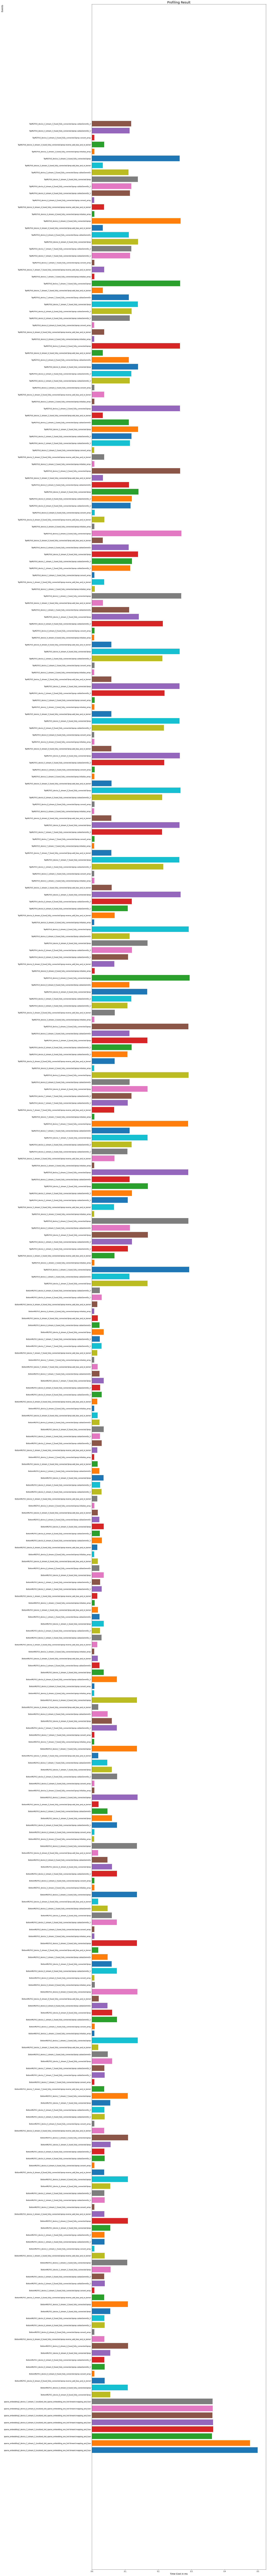

In [4]:
generate_schedule(dlrm_perf_schedule, repeat_for_each_event=50)
#some how run the hugectr --train, not added yet
result = parse_result()
#print(result)
#print_result(result)
draw_barh(result)